# Algoritmos de optimización - Reto 1

Nombre: Rubén Cuenca Carbonell<br>
Github: https://github.com/RCuencaOrbita/algoritmos-optimizacion/blob/main/Algoritmos_R1.ipynb<br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás.

In [1]:
# Torres de Hanoi
#definición del algoritmo
def torresHanoi (discos,torreOrigen,torreDestino,torreAuxiliar):
    #caso básico
    if(discos==1):
        moverDisco(torreOrigen,torreDestino)
        return
    #caso recursivo: mover de origen a auxiliar n-1 discos usando destino como auxiliar
    torresHanoi(discos-1,torreOrigen, torreAuxiliar, torreDestino)
    #movimiento efectivo de origen a destino del último disco de esta recursión
    moverDisco(torreOrigen, torreDestino)
    #recomponer la pila de n-1 discos de la torre auxiliar a la de destino
    torresHanoi(discos-1,torreAuxiliar, torreDestino, torreOrigen)
#método de movimiento para un único disco
def moverDisco (torreOrigen,torreDestino):
    #desapilar disco de torre origen y ponerlo en variable auxiliar
    disco=torreOrigen.pop()
    #añadir disco a la pila destino
    torreDestino.append(disco)
    #mostrar estado de las torres tras el movimiento
    print(torre1,torre2,torre3)

#preparación del modelo
torre1 = []
torre2 = []
torre3 = []
#definir numero de discos
numDiscos=5
#apilar los discos en la torre 1
for i in range(numDiscos-1,-1,-1):
    torre1.append(i)
#mostrar estado inicial de las torres
print(torre1,torre2,torre3)
torresHanoi(numDiscos,torre1,torre2,torre3)





[4, 3, 2, 1, 0] [] []
[4, 3, 2, 1] [0] []
[4, 3, 2] [0] [1]
[4, 3, 2] [] [1, 0]
[4, 3] [2] [1, 0]
[4, 3, 0] [2] [1]
[4, 3, 0] [2, 1] []
[4, 3] [2, 1, 0] []
[4] [2, 1, 0] [3]
[4] [2, 1] [3, 0]
[4, 1] [2] [3, 0]
[4, 1, 0] [2] [3]
[4, 1, 0] [] [3, 2]
[4, 1] [0] [3, 2]
[4] [0] [3, 2, 1]
[4] [] [3, 2, 1, 0]
[] [4] [3, 2, 1, 0]
[0] [4] [3, 2, 1]
[0] [4, 1] [3, 2]
[] [4, 1, 0] [3, 2]
[2] [4, 1, 0] [3]
[2] [4, 1] [3, 0]
[2, 1] [4] [3, 0]
[2, 1, 0] [4] [3]
[2, 1, 0] [4, 3] []
[2, 1] [4, 3, 0] []
[2] [4, 3, 0] [1]
[2] [4, 3] [1, 0]
[] [4, 3, 2] [1, 0]
[0] [4, 3, 2] [1]
[0] [4, 3, 2, 1] []
[] [4, 3, 2, 1, 0] []


## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

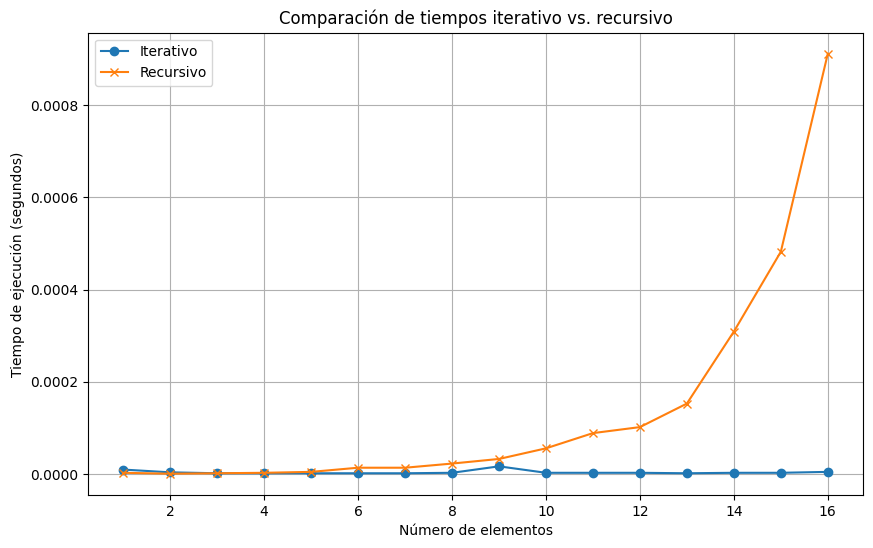

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt

#Sucesión_de_Fibonacci
def fibonacciIterativo(orden):
    #casos simples, orden 0 y 1 resultado = entrada
    if orden == 0 or orden == 1:
        return orden
    #inicializo las variables auxiliares del proceso con los casos simples
    resultadoPrevio=1
    resultadoAnteriorAlPrevio=0
    #itero a partir del segundo término, con cambio de variable sobre resultado
    for i in range(2, orden + 1):
        resultado = resultadoPrevio+resultadoAnteriorAlPrevio
        resultadoAnteriorAlPrevio = resultadoPrevio
        resultadoPrevio=resultado
        #print(resultado)
    return resultado

def fibonacciRecursivo(orden):
    #caso básico
    if orden == 0 or orden == 1:
        #print(orden,orden)
        return orden
    else:
        resultado = fibonacciRecursivo(orden - 1) + fibonacciRecursivo(orden - 2)
        #print(orden,resultado)
        return resultado

elementos=[]
iterativo=[]
recursivo=[]
i=0
while i<16:
    i+=1

    start = datetime.now()
    fibonacciIterativo(i)
    stop = datetime.now()
    duration = (stop-start).total_seconds()
    elementos.append(i)
    iterativo.append(duration )

    start = datetime.now()
    fibonacciRecursivo(i)
    stop = datetime.now()
    duration = (stop-start).total_seconds()
    recursivo.append(duration)

plt.figure(figsize=(10, 6))
plt.plot(elementos, iterativo, label='Iterativo', marker='o', linestyle='-')
plt.plot(elementos, recursivo, label='Recursivo', marker='x', linestyle='-')
plt.xlabel('Número de elementos')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Comparación de tiempos iterativo vs. recursivo')
plt.legend()
plt.grid(True)



## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [3]:
# Problema del cambio de moneda
monedas = [100,50,20.0,10.0,5.0,2.0,1.0,0.5,0.2,0.1,0.05]

def devolverCambio(importe: float,pagado: float,monedas: list[float]):
    #ordeno la colección de cambios por valor descendente
    monedas.sort(reverse=True)
    #calculo el total a devolver
    resto = pagado-importe
    cambio=[]
    for i in range(0,len(monedas)):
        while monedas[i] <= resto:
            cambio.append(monedas[i])
            resto=resto-monedas[i]
    return cambio,resto
importe = 23.91
pagado = 200.0
cambio, resto= devolverCambio(importe,pagado,monedas)
print(cambio)



[100, 50, 20.0, 5.0, 1.0, 0.05]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [4]:
import numpy as np
# Problema de las N-Reinas
def nReinas(nMax: int, fila:int, reinas: list, diagonalAscendente: list, diagonalDescendente:list, solucion:list):
    #print('reinas',reinas)
    #print('fila',fila,'nMax',nMax)
    if(fila==nMax+1):
        #print('SOLUCION!!!!!!!!',reinas)
        solucion.append(reinas)
    #recorrer columnas
    for columna in range(1,nMax+1):
        if columna not in reinas and (fila-columna) not in diagonalDescendente and (fila+columna) not in diagonalAscendente:
            reinasCopia=reinas.copy()
            reinasCopia.append(columna)
            descCopia= diagonalDescendente.copy()
            descCopia.append(fila-columna)
            ascCopia= diagonalAscendente.copy()
            ascCopia.append(fila+columna)
            nReinas(nMax,fila+1,reinasCopia,ascCopia,descCopia,solucion)
    return solucion

diagonalAscendente=[]
diagonalDescendente=[]
reinas=[]
solucion=[]
res = nReinas(8,1,reinas,diagonalAscendente,diagonalDescendente,solucion)
res=np.asmatrix( res)
print(res.shape)
print('soluciones',res)






(92, 8)
soluciones [[1 5 8 6 3 7 2 4]
 [1 6 8 3 7 4 2 5]
 [1 7 4 6 8 2 5 3]
 [1 7 5 8 2 4 6 3]
 [2 4 6 8 3 1 7 5]
 [2 5 7 1 3 8 6 4]
 [2 5 7 4 1 8 6 3]
 [2 6 1 7 4 8 3 5]
 [2 6 8 3 1 4 7 5]
 [2 7 3 6 8 5 1 4]
 [2 7 5 8 1 4 6 3]
 [2 8 6 1 3 5 7 4]
 [3 1 7 5 8 2 4 6]
 [3 5 2 8 1 7 4 6]
 [3 5 2 8 6 4 7 1]
 [3 5 7 1 4 2 8 6]
 [3 5 8 4 1 7 2 6]
 [3 6 2 5 8 1 7 4]
 [3 6 2 7 1 4 8 5]
 [3 6 2 7 5 1 8 4]
 [3 6 4 1 8 5 7 2]
 [3 6 4 2 8 5 7 1]
 [3 6 8 1 4 7 5 2]
 [3 6 8 1 5 7 2 4]
 [3 6 8 2 4 1 7 5]
 [3 7 2 8 5 1 4 6]
 [3 7 2 8 6 4 1 5]
 [3 8 4 7 1 6 2 5]
 [4 1 5 8 2 7 3 6]
 [4 1 5 8 6 3 7 2]
 [4 2 5 8 6 1 3 7]
 [4 2 7 3 6 8 1 5]
 [4 2 7 3 6 8 5 1]
 [4 2 7 5 1 8 6 3]
 [4 2 8 5 7 1 3 6]
 [4 2 8 6 1 3 5 7]
 [4 6 1 5 2 8 3 7]
 [4 6 8 2 7 1 3 5]
 [4 6 8 3 1 7 5 2]
 [4 7 1 8 5 2 6 3]
 [4 7 3 8 2 5 1 6]
 [4 7 5 2 6 1 3 8]
 [4 7 5 3 1 6 8 2]
 [4 8 1 3 6 2 7 5]
 [4 8 1 5 7 2 6 3]
 [4 8 5 3 1 7 2 6]
 [5 1 4 6 8 2 7 3]
 [5 1 8 4 2 7 3 6]
 [5 1 8 6 3 7 2 4]
 [5 2 4 6 8 3 1 7]
 [5 2 4 7 3 8 6 1]
 [5 2 6 1 7 